2022-07-11 14:37:37,136 - PySpice.Spice.Library.Library.__init__ - WARNING - Problem parsing ./Libs/CMOS35.lib - Bad kwarg: level = 7 MOBMOD =1.000e+00 CAPMOD =2.000e+00 NOIMOD =3.000e+00 K1     =5.9959e-01 K2     =-6.038e-02 K3     =1.103e+01 K3B    =-7.580e-01 NCH    =9.240e+16 VTH0   =-6.915e-01 VOFF   =-1.170e-01 DVT0   =1.650e+00 DVT1   =3.868e-01 DVT2   =1.659e-02 KETA   =-1.440e-02 PSCBE1 =5.000e+09 PSCBE2 =1.000e-04 DVT0W  =1.879e-01 DVT1W  =7.335e+04 DVT2W  =-6.312e-03 UA     =5.394e-10 UB     =1.053e-18 UC     =1.000e-20 U0     =1.482e+02 DSUB   =5.000e-01 ETA0   =2.480e-01 ETAB   =-3.917e-03 NFACTOR=1.214e+00 EM     =4.100e+07 PCLM   =3.184e+00 PDIBLC1=1.000e-04 PDIBLC2=1.000e-20 DROUT  =5.000e-01 A0     =5.850e-01 A1     =0.000e+00 A2     =1.000e+00 PVAG   =0.000e+00 VSAT   =1.158e+05 AGS    =2.468e-01 B0     =8.832e-08 B1     =0.000e+00 DELTA  =1.000e-02 PDIBLCB=1.000e+00 W0     =1.000e-10 DLC    =2.4500e-08 DWB    =0.000e+00 DWG    =0.000e+00 LL     =0.000e+00 LW     =0.0

(-11.0, 11.0)

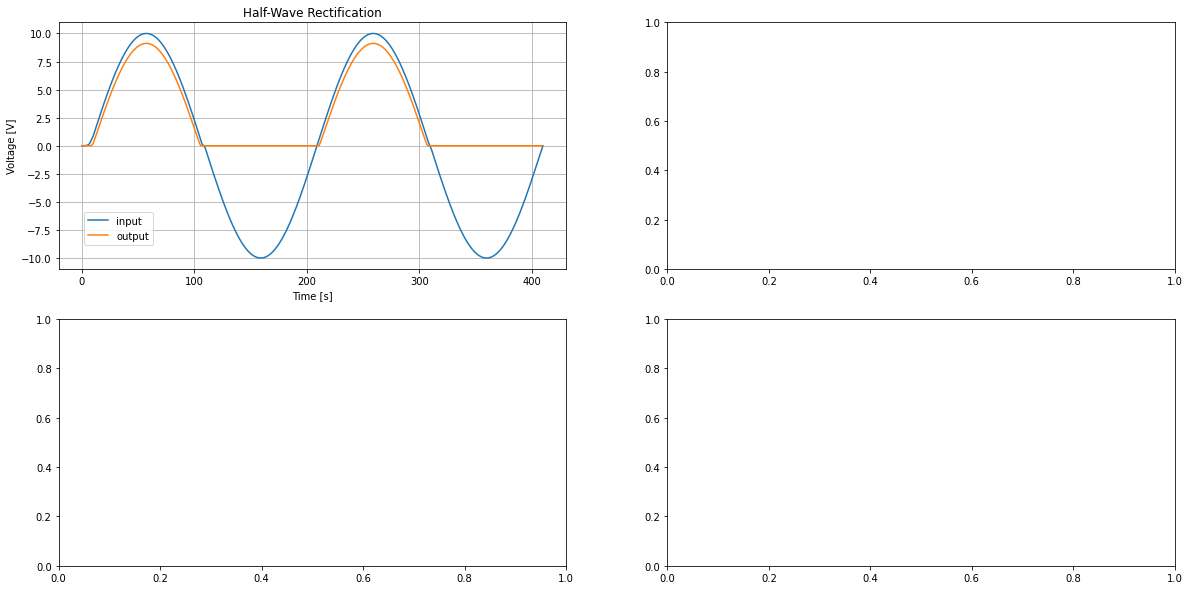

In [1]:
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


spice_library = SpiceLibrary("./Libs/")


figure1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))


circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'inp', circuit.gnd, amplitude=10@u_V, frequency=50@u_Hz)
circuit.X('D1', '1N4148', 'inp', 'output')
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax1.set_title('Half-Wave Rectification')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax1.grid()
ax1.plot(analysis['inp'])
ax1.plot(analysis.output)
ax1.legend(('input', 'output'), loc=(.05,.1))
ax1.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))